In [1]:
import numpy as np

In [36]:
def expand_dimension(array,dimension,direction):
    new_array = array
    
    if direction == 0:
        for i in range(dimension):
            new_array = np.expand_dims(new_array,axis=0)
    if direction == 1:
        for i in range(dimension):
            new_array = np.expand_dims(new_array,axis=1)
        
    return new_array


def linear_equation(X,y,ones=0):
    if ones == 1:
        one = np.ones((X.shape[0],1))
        X = np.append(one, X, axis=1)
        
        return np.linalg.inv(X.T@X)@(X.T@Y_tilda)
    
    if ones == 0:
        return np.linalg.inv(X.T@X)@(X.T@Y_tilda)

/var/folders/r9/9kmctj5907z_qfw6hp7s7bb40000gn/T/ipykernel_99017/2259366585.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


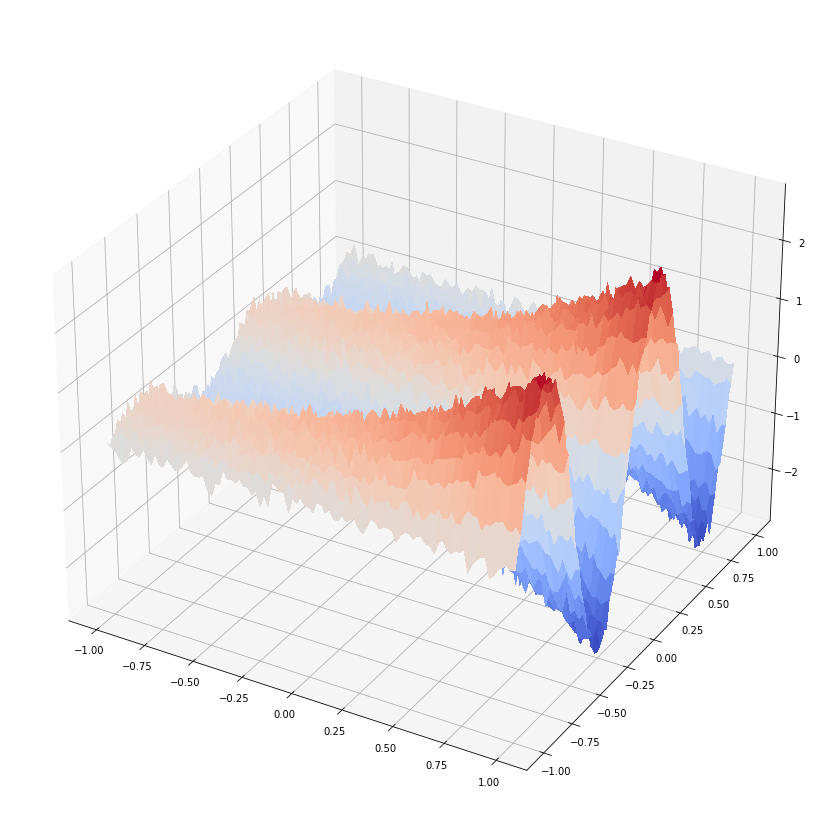

In [45]:
#Linear Regression for general functions
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = [15, 15]


pi=math.pi

fig = plt.figure()
ax = fig.gca(projection='3d')
x1=np.linspace(-1,1,100)
x2=np.linspace(-1.001,1,100)
[X1,X2]=np.meshgrid(x1,x2)

Y=np.exp(X1)*np.sin(2*pi*1*X2)+0.1*np.random.randn(X1.shape[0],X1.shape[1])


surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)



In [31]:
X1_tilda = X1.reshape(X1.shape[0]*X1.shape[1])
X2_tilda = X2.reshape(X2.shape[0]*X2.shape[1])


Y_tilda = np.reshape(Y, (Y.shape[0]*Y.shape[1]))


In [32]:
# X1_tilda = X1_tilda[:, np.newaxis, np.newaxis]
# X2_tilda = X2_tilda[ :, np.newaxis, np.newaxis]


X1_tilda = expand_dimension(X1_tilda,2,1)
X2_tilda = expand_dimension(X2_tilda,2,1)


In [39]:
basis = 8

I = np.arange(basis+1)
I = I[np.newaxis, :, np.newaxis]

J = expand_dimension(np.arange(basis+1),2,0)

I.shape

(1, 9, 1)

In [40]:
X = X1_tilda**I * X2_tilda**J
X = np.reshape(X, (X.shape[0], X.shape[1]*X.shape[2]))

print(X.shape)

(10000, 81)


In [41]:
W = np.linalg.inv(X.T@X)@(X.T@Y_tilda)

In [42]:
yhat = np.reshape(X@W, (Y.shape[0],Y.shape[1]))

yhat.shape

(100, 100)

/var/folders/r9/9kmctj5907z_qfw6hp7s7bb40000gn/T/ipykernel_99017/1837748246.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


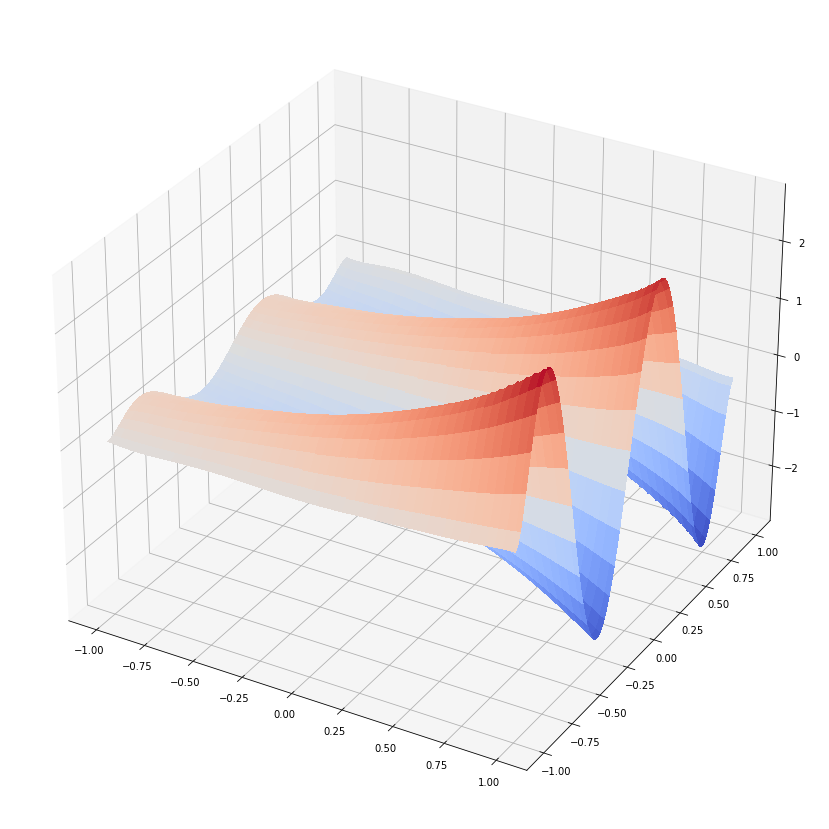

In [44]:
plt.rcParams['figure.figsize'] = [15, 15]

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X1, X2, yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

w = np.linalg.inv(X.T@X + reg*np.eye(basis))@(X.T@Y_tilda)
